In [1]:
# this is some code to get pretty highlighted cells for the questions - ignore this
from IPython.display import HTML
style1 = "<style>div.warn { background-color: #fcf2f2;border-color: #dFb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;}</style>"
HTML(style1)

This notebook covers some worked examples and some examples for you to try relating to **Block A, Chapter 2** in the notes.  This is practice and core material for coursework 1. The green questions are those most closely related to the assessed work for this module. *Once you have completed this notebook, you will be able to attempt QNs 2 and 3 on coursework 1.*

## Core concepts

**The BEST estimate (mean, standard deviation, variance and median)**

Imagine we are trying to measure the length of a snake, where length is defined as x.  The snake keeps moving around so we know we will have some errors in our measurements.  We decide to take *10 measurements* and we measure the length x to be:

26, 24, 26, 28, 23, 24, 25, 24, 26, 25

The best way to estimate the length would be to simply take the *mean*.

\begin{equation*}
\hat{x} =  \dfrac{\sum^N_i x_i}{N}
\end{equation*}

where N is the number of measurements.

What about an error on our mean?  We can do this by asking what is the difference between each value we measure and our mean value eg $d = x_i - \hat{x}$?  But we have 10 of these estimates and we only want one number for our error, so we need to sum these values and divide by $N$. *However* this does not account for the fact that $d$ can be positive or negative, so what we really want is a value of the absolute difference between the mean and our individual measurements. To do this we need to square our differences.  The error then is the well known standard deviation $\sigma_x$

$\sigma_x =  \sqrt{ \dfrac{\sum^N_i (x_i - \hat{x})^2}{N} }$

except that we need to take into account the number of degrees of freedom. This is because we've had to use the data to estimate our mean $\hat{x}$ in order to calculate the *sample* standard deviation so it is in fact:

$\sigma_x =  \sqrt{ \dfrac{\sum^N_i (x_i - \hat{x})^2}{N-1}} $

Or we can cheat a little and use inbuilt stat functions from numpy and scipy

In [2]:
import scipy.stats as stats
import numpy as np

x = [26,24,26,28,23,24,25,24,26,25]
n=len(x)

mean = np.mean(x) 

standard_dev = np.std(x)  # standard deviation function in numpy

standard_error = stats.sem(x)  # standard error on the mean function in scipy.stats

standard_dev_samp = np.sqrt( np.sum((x-mean)**2.0)/(n-1)) # standard deviation sample N-1


print('mean = {:.2f} '.format(mean))
print('standard deviation = {:.2f}'.format(standard_dev) )
print('error on mean = {:.2f}'.format(standard_error))
print('sample standard deviation = {:.2f}'.format(standard_dev_samp) )


mean = 25.10 
standard deviation = 1.37
error on mean = 0.46
sample standard deviation = 1.45


So let's now take a look at our distribution of data for the length of the snake.  Let's take each *different* measured length to be $x_k$ and look at how many times that value was measured.

|Measured length of snake|23|24|25|26|27|28|
|----|---|
|Frequency of how many times that length is measured|1|3|2|3|0|1|

If we were to plot this as a bar graph, this would be the histogram. 

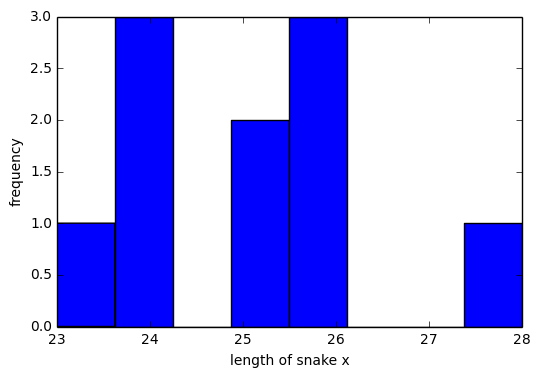

In [3]:
# to make a plot we need to import plotting package
from pylab import plt
# this makes the plot appear in the notebook
% matplotlib inline

# length of snake measurements
x = [26,24,26,28,23,24,25,24,26,25]

# plot the histogram
plt.hist(x,bins=8,histtype='bar')
plt.ylabel('frequency')
plt.xlabel('length of snake x')
plt.show()

The mean in this case would be 

\begin{equation*}
\hat{x} = {\sum_k x_k n_k \over {N}}
\end{equation*}

where $n_k$ is the number of instances that that the measurement $x_k$ was made.  Note that $\sum n_k = N$. 

We can look at this another way, each result $x_k$ occurs a certain fraction of times $F_k$ where, out of 10 measurements, we measured a value of 24 three times ie $F_k = n_k/N$.  The mean would then be 

\begin{equation*}
\hat{x} = {\sum_k x_k F_k}
\end{equation*}

and $\sum_k F_k = 1$.

What if our measurements were not exactly 23 and 24, but were instead 23.6 and 24.3? Our new, more precise, measurements of the length of the snake are 

26.4, 23.9, 25.1, 24.6, 22.7, 23.8, 25.1, 23.9, 25.3, 25.4. 

So we now need to think of distributing them in the following way 

|Bin|22 to 23|23 to 24|24 to 25|25 to 26|26 to 27|27 to 28|
|----|---|
|Frequency of how many times that length is measured|1|3|1|4|1|0|

where the bin width is denoted as $\Delta_k$, and the area of the bin represents the fraction of measurements that fall within the $k$th bin ie $f_k\Delta_k$.  

Now we can start talking about what happens as our number of measurements approaches infinity $N \to \infty$. Two things will happen. 1) the distribution (our histogram) is said to approach the *limiting distribution* and 2) $f_k \to f(x)$ and $\Delta_k \to dx$ so that, whereas before we had $\sum f_k ~ \Delta_k = 1$ for all $k$, now we have

\begin{equation*}
\int^{\infty}_{-\infty} f(x)~ dx = 1
\end{equation*}

and so the histrogram approaches the *probability density function* (PDF) of the limiting distribution. 

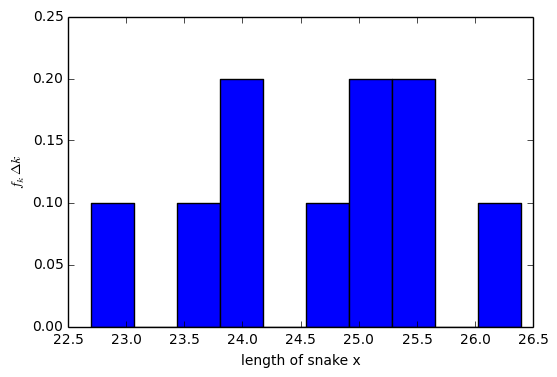

In [4]:
# to make a plot we need to import plotting package
from pylab import plt
# this makes the plot appear in the notebook
% matplotlib inline

# length of snake measurements
x = [26.4,23.9,25.1,24.6,22.7,23.8,25.1,23.9,25.3,25.4]

# get the histogram counts (frequency) and the bin edges from python
hist, bin_edges = np.histogram(x, normed=True)
# need to work out size of bins as we want to plot freq x bin width on y axis
binWidth = bin_edges[1] - bin_edges[0]

# plot
plt.bar(bin_edges[:-1], hist*binWidth, binWidth)
plt.ylabel('$f_k \Delta k$')
plt.xlabel('length of snake x')
plt.show()

We can now introduce the formal definition of the mean as $N \to \infty$:

\begin{equation*}
\hat{x} = \sum_k x_k ~ F_k = \sum_k x_k~ f_k ~\Delta_k \to \int^{\infty}_ {-\infty} x ~f(x)~ dx 
\end{equation*}

and similarly for the standard deviation: 

\begin{equation*}
\sigma_x = \sqrt{  \int^{\infty}_ {-\infty} (x-\hat{x})^2 ~f(x)~ dx   }
\end{equation*}

where we don't need to worry about $N$ or $N-1$ in the denominators as we're in the regime where $N \to \infty$. 

Because we now have this terminology, we can also define the *cumulant* distribution where

\begin{equation*}
F(x') = \int^{x'}_ {-\infty} f(x)~ dx 
\end{equation*}

where $F(x')$ tells us the percentile that $x'$ represents, eg if $F(x')=0.6$ then 0.6 or 60% of the area under the function $f(x)$ would lie in the range $\le x'$. Note that the lower limit could be any bound over which the distribution is valid.

The *median* is the special case where $F(x) = 0.5$ - the 50th percentile. 

We have been introduced to the idea that histograms are an approximation to the underlying limiting distribution and that experimental results sample from the limiting distribution.

**Bias** 

In statistics, the bias (or bias function) of an estimator is the difference between this estimator's expected value $E(x)$ and the true value of the parameter being estimated. An estimator or decision rule with zero bias is called unbiased.  Or we can write this another way: an estimator is said to be unbiased, if the estimator tends towards the expected value as the sample size (i.e. the number of values / measurements) tends towards infinity.

The mean is an unbiased estimator of $E(x)$, since as the number of points increases, the mean tends towards $E(x)$.

**Maximum likelihood** is the idea is that the best guess for the values of $x_0$ and $\sigma$ are those that maximise the probability. Given $N$ observed measurements $x_1,...,x_N$, the best estimates for the mean and standard deviation are those values for which the observed $x_1,...,x_N$ are most likely, or rather where $p_{\hat{x},\sigma}(x_1,...,x_N)$ is the maximum.

** The Normal Distribution**

The form of the normal distribution with width $\sigma$, for data value $x$ centred on a value of $x$ given by $x_0$

$N_{x_0, \sigma}(x) = \dfrac{1}{\sigma\sqrt{2\pi}} e^{-(x-x_0)^2/2\sigma^2}.$

We can show that the mean of the normal distribution is simply 

$\hat{x} = x_0$

and the standard deviation of the data that follow a normal distribution is

$\sigma_x = \sigma$.

How did we get this?

We first have to normalise the function to use it as a probability, such that it satisfies,

$\int_{-\infty}^{\infty} N(x) dx = 1$ 

We introduce a constant $C$, such that,

$N(x) = C\, e^{-(x-x_0)^2/2\sigma^2}.$

Note that $C$ only serves to the move the curve up an down in $y$, but leaves the shape and centring undisturbed; it obviously changes the area under the curve though, which is the whole point in the normalisation. To evaluate the integral, we make a change of variable, by setting $(x - x_0)/\sigma = z$, such that $dx = \sigma dz$ to get,

$\int_{-\infty}^{\infty} N(z) dz = C\sigma\, \int_{-\infty}^{\infty} e^{-z^2/2} dz$

This is a standard integral in physics, and has the result,

$\int_{-\infty}^{\infty} e^{-z^2/2} dz = \sqrt{2\pi},$

which yields the value for the normalisation $C = 1/ \sigma\sqrt{2\pi}$. We can then write the final form for the normal distribution as,

$N_{x_0, \sigma}(x) = \dfrac{1}{\sigma\sqrt{2\pi}} e^{-(x-x_0)^2/2\sigma^2}$

The know that the mean of a PDF is 

$\hat x = \int_{-\infty}^{\infty} x\,N_{x_0, \sigma}(x) dx =  \dfrac{1}{\sigma\sqrt{2\pi}} \int_{-\infty}^{\infty} x\, e^{-(x-x_0)^2/2\sigma^2} dx.$

Again, this can be evaluated with a change of variables, replacing $x - x_0 = y$, such that $dx = dy$ and $x = y + x_0$. This results in,

$\hat x =  \dfrac{1}{\sigma\sqrt{2\pi}} \left( \int_{-\infty}^{\infty} y \,e^{-y^2/2\sigma^2} dy ~ + ~ x_0 \int_{-\infty}^{\infty} e^{-y^2/2\sigma^2} dy    \right).$

The first integral is zero, since although the exponential term is symmetric about $y = 0$, the $y$ is not, and so the points from $-y$ are exactly cancelled by those from $+y$. The second integral is the same as that we seen above, and is just $\sigma \sqrt{2\pi}$, which cancels with the term at the front, leaving us with,

$\hat x = x_0$.

Similarly for the standard deviation.

If the measurement of a particular quantity is subject to many, independent and random errors, then the *central limit theorem* allows us to use the normal distribution to model the quantity’s errors.


Note that there are two types of errors:
*statistical errors* - from random nature of measurement process, can be reduced by increasing the number of measurements and averaging over them.
*systematic errors* - these arise from flawed measurements (eg voltmeter adding +2V to every measurement because its not properly calibrated). This is easy to spot as it remains even after repeating measurements multiple times.

** Probabilities from Normal distributions**

Since $N_{x_0, \sigma}(x)$ is a PDF, the probability of $x$ lying in the range $a$ to $b$ is then given by,

$\int_a^b  N_{x_0, \sigma}(x) dx.$

So what about the probability of lying within $\pm t \sigma$ eg 1, 2 or 3$\sigma$, where $t$ is some real (positive) number? This is given by,

$P(\rm{within} ~t \sigma) = \dfrac{1}{\sigma \sqrt{2\pi}} \int_{x_0 - t\sigma}^{x_0 + t\sigma} e^{-(x - x_0)^2/2\sigma^2} dx.$

Once again, substitution of $(x-x_0)/\sigma = z$, with $dx = \sigma dz$ and now limits of $-t$ to $t$, we have,

$P(\rm{within} ~t \sigma) = \dfrac{1}{\sqrt{2\pi}} \int_{-t}^{+t} e^{-z^2/2} dz.$

The equation above is known as the *error function*.  Unfortunately, it can not be evaluated analytically, however using a computer, it is possible to obtain values for the integral as a function of $t$, and we can use reference tables to look this up.  The probability that a measurement lies within $1\sigma$ of the mean is 68%. 

\Pr(\mu -1\sigma \leq X\leq \mu +1\sigma )&\approx 0.6827\\\Pr(\mu -2\sigma \leq X\leq \mu +2\sigma )&\approx 0.9545\\\Pr(\mu -3\sigma \leq X\leq \mu +3\sigma )&\approx 0.9973\end{aligned}}}

$P(\mu -1\sigma < X < \mu + 1\sigma) \sim 0.6827$ 

$P(\mu -2\sigma < X < \mu + 2\sigma) \sim 0.9545$

$P(\mu -3\sigma < X < \mu + 3\sigma) \sim 0.9973$

## WORKED EXAMPLE:

At a facility that manufactures electrical resistors, a statistical sample of 1 k$\Omega$ resistors is pulled from the production line. The resistor's resistances are measured and recorded. A mean resistance of 979.8 k$\Omega$ and a standard deviation of 73.10 k$\Omega$ represents the sample of resistors. The desired resistance tolerance for the 1-k$\Omega$ resistors is $\pm$ 10%. This tolerance range means the acceptable range of resistance is 900 to 1100 $\Omega$. 

Assuming a normal distribution, show the probability that a resistor picked off the production line is within the desired tolerance on a plot.

**Answer**

As we are interested in the probability, we use the equation above

$P(\rm{within} ~t \sigma) = \dfrac{1}{\sqrt{2\pi}} \int_{-t}^{+t} e^{-z^2/2} dz.$

/Users/haley/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


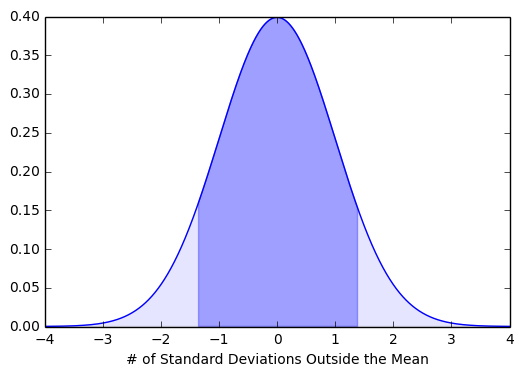

In [5]:
import numpy as np
import pylab as plt
# install packaged to do a normal function
from scipy.stats import norm

%matplotlib inline

# define constants
mu = 998.8 
sigma = 73.10

# acceptable values of resistance
x1 = 900
x2 = 1100

# calculate the z-transform x - x_o /sigma
# this will move x axis to +/- sigmas rather than resistance
z1 = ( x1 - mu ) / sigma
z2 = ( x2 - mu ) / sigma

# range of x in spec 
x = np.arange(z1, z2, 0.001) 

# plot distribution for +/1 10 sigma as comparison
x_all = np.arange(-10, 10, 0.001) 

# mean = 0, stddev = 1, since Z-transform was calculated
y = norm.pdf(x,0,1)
y2 = norm.pdf(x_all,0,1)

# build the plot
plt.plot(x_all,y2)

# this shows dark shaded region for acceptable values of resistor
plt.fill_between(x,y,0, alpha=0.3, color='b') 
# this gills in the gap between the PDF and the accepted values
plt.fill_between(x_all,y2,0, alpha=0.1)
plt.xlim([-4,4])
plt.xlabel('# of Standard Deviations Outside the Mean')
plt.show()

Notice how the area corresponding to resistors in the given specification (between the upper and lower bounds) is shaded.

**Bernoulli Distribution**

A Bernoulli event is one in which the outcomes are of the yes/no variety, such as, did the coin land heads?, did the patient survive 3 years after treatment? 

If our probability of success in one trial is represented by $\theta$, we can then write the probability of success in $p$ given $\theta$ as,

$p(x|\theta) = \theta^x(1 − \theta)^{(1−x)}$.

where $x= 0$ for failure, or $1$ for success. Eg for rolling a six with a fair dice, $x=1$ for rolling a 6, and 0 for anything else. In this case the probability for rolling a six in one trial $\theta$ would be 1/6.

We can write the probability of obtaining any particular sequence of successes for $\nu =$ number of successes 

$p(\nu|N, \theta) = \theta^{\nu} (1 − \theta)^{(N−\nu)}$

** The Binomial Distribution** 

Binomial distribution is a discrete probability distribution like Bernoulli. It can be used to obtain the number of successes from N Bernoulli trials.

Let's consider rolling 3 dice at the same time. What is the probability of getting $\nu$ sixes, where now $\nu = \{0, 1, 2, 3\}$?  First, consider $\nu = 0$,

$p(\rm{not~ 6, not ~6, not~ 6}) = \left( \dfrac{5} {6} \right)^3$
and then consider $\nu = 3$,

$p(\rm{6, ~6,~ 6}) = \left( \dfrac{1} {6} \right)^3.$

These were the most straightforward as there is only 1 way in which they can occur. But now let's consider ($\nu = 1$). This can occur in 3 ways:

\begin{align}
p(\rm{one ~6 ~in~ 3}) & =  p(\rm{6, not ~6, not ~6}) +  p(\rm{not~ 6, 6, not ~6}) + p(\rm{not ~6, not~ 6,~ 6}) \\
                                      & =  3 \left( \dfrac{1} {6} \right) \left( \dfrac{5} {6} \right)^2.
\end{align}

Similarly for $\nu = 2$:

\begin{align}
p(\text{two 6 in 3}) & =  p(\text{6, 6, not 6}) +  p(\text{6, not 6,  6}) + p(\text{not 6, 6, 6}) \\
                                      & =  3 \left( \dfrac{1} {6} \right)^2 \left( \dfrac{5} {6} \right).
\end{align}

The coefficients that sit in front of the $\theta$ and $\theta -1$ terms are given by the Binomial Coefficient,


\begin{align}
{N \choose \nu} & = \dfrac{N(N-1) \dotsb (N - \nu + 1)}  {1 \times 2 \times \dotsb  \times \nu} \\
                                      & = \dfrac{N!} {\nu!(N - \nu)!}
\end{align}

The *Binomial Distribution* is therefore,


$B_{N, \theta} (\nu) = {N \choose \nu} \theta^\nu (1 - \theta)^{(N - \nu)}.$

The mean of the Binomial Distribution are given by,

\begin{align}
\hat{\nu} & = \sum \nu B_{N, \theta} (\nu) \\
& = N \theta,
\end{align}

that is, if you repeat the experiment $N$ times, the average number of successes is simply the probability of success in any one trail times the number of trials. The standard deviation is little trickier to evaluate, but is given by,

$\sigma_{\nu} = \sqrt{N\theta(1 - \theta)}.$

You can get access to python's inbuilt binomial calculator by using `scipy.stats`.   


## Worked example:

Suppose a dice is tossed 5 times. What is the probability of getting exactly 2 fours?

**Answer:** 

This is a binomial experiment in which the number of trials is equal to 5, the number of successes is equal to 2, and the probability of success on a single trial is 1/6.  The binomial distribution is given by

$B_{N, \theta} (\nu) = {N \choose \nu} \theta^\nu (1 - \theta)^{(N - \nu)}.$

In [6]:
from scipy.stats import binom

# set up values
N=5
nu = 2

# prob of single trial
theta = 1./6

prob = binom.pmf(nu,N, theta)

print('probability of getting exactly 2 fours is {:.2f}'.format(prob))

probability of getting exactly 2 fours is 0.16


What does the binomial distribution look like if the probability of success in $N=17$ trials is $\theta = 0.7$?

the mean and standard deviation are 11.90 +/- 1.89


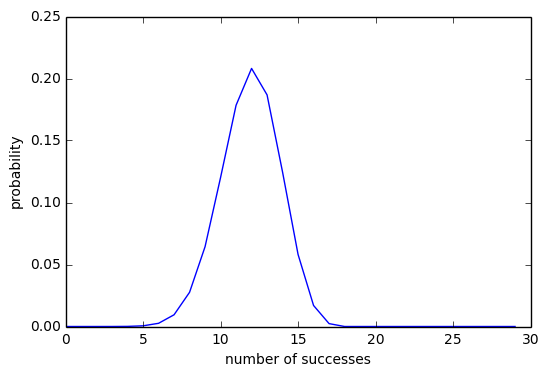

In [7]:
import pylab as plt
%matplotlib inline  

# generate some x values to plot the binomial function
x = np.arange(0,30)

n =17
theta = 0.7

mean_bi = n*theta
err_bi = np.sqrt(n*theta*(1-theta))

print('the mean and standard deviation are {:.2f} +/- {:.2f}'.format(mean_bi,err_bi))

data=binom.pmf(x,n,theta)
plt.plot(x,data)
plt.xlabel('number of successes')
plt.ylabel('probability')
plt.show()

**Beta Distributions**

The functional family that has the same form as Bernoulli and Binomial distributions are called *beta distributions*. The probability density function are (usually) denoted  by,

$p(\theta | ~a, b) = \rm{beta}(\theta | a, b) =  \dfrac{ \theta^{(a - 1)} (1 - \theta)^{(b - 1)} }{B(a, b)}$

where $a$ and $b$ are shape paramaters and $B(a, b)$ is the normalisation factor that ensures that the area under the curve integrates to unity,

$B(a, b) = \int_0^1 \theta^{(a - 1)} (1 - \theta)^{(b - 1)} d\theta.$

The mean and variance of the beta distribution are given by,

$\hat{\theta}_{B} = \dfrac{a}{a+b}$

$\sigma_{\sigma}^2  = \dfrac{ \hat{\theta}(1 - \hat{\theta})}  {a + b + 1}.$

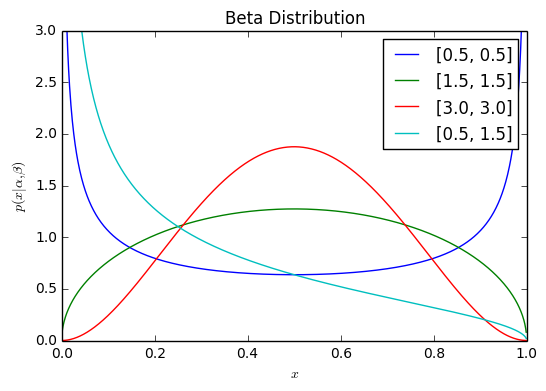

In [8]:
# let's plot some beta distributions
# import the distribution and do it the easy way:
from scipy.stats import beta

# let's do it for 4 different parameters

a = [0.5, 1.5, 3.0, 0.5]
b = [0.5, 1.5, 3.0, 1.5]

# list indexing, example [:}] returns all elements and [:-1] returns all except the last one [:-1]
x = np.linspace(0, 1, 1002)[1:-1]

for i in range(0,len(a)):
    dist = beta(a[i],b[i])
    plt.plot(x, dist.pdf(x),label=[a[i],b[i]])
plt.xlim(0, 1)
plt.ylim(0, 3)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\alpha,\beta)$')
plt.title('Beta Distribution')
plt.legend()
plt.show()

**The Poisson Distribution**

The Poisson Distribution is essentially the limit of the Binomial Distribution in the case where the number of trials is very large $N$ is very large (think atoms in a lump of Uranium), and the probability $\theta$ is very small (the chances of a single atom decaying in a hour). In such a case, the Poisson Distribution is given by,

$P_\mu(\nu) = e^{-\mu} \, \dfrac{\mu^\nu} {\nu!}$

where $\mu$ is the mean count rate, and $P_\mu(\nu)$ stands for the the probability of $\nu$ successes (counts) in a specific interval.

The standard deviation of the Poisson Distribution is given by
$\sigma_{\nu} = \sqrt{\mu}$.

This is neat result: if we measure a given number of counts $\hat{\nu}$ in a given interval, then the uncertainty on our count rate is simply $\sqrt{\hat \nu}$.

Once again, the Normal distribution can be used as an approximation to the mean, this time in the limit that $\mu$ is large. Also note that the Poisson Distribution is *not* symmetric about the mean.

## Marginalisation

There may exist a function $p(x, y)$ that yields the probability of both $x$ and $y$. This type of function may be a combination of discrete and continuous variables and will have units of $1/xy$. But suppose we wanted to know just $p(x)$. How do we calculate this, given that we only have $p(x, y)$? If you consider the units of the problem, the answer becomes clear: we just need to integrate or sum over $y$, i.e.

$p(x) = \int p(x, y) dy$

if $y$ is a continuous variable, or

$p(x) = \sum_y p(x, y)$

if $y$ is discrete. This process is called *marginalising over y*. We could do the same to get $p(y)$. Marginalisation is extremely important, since it allows us to deal with nuisance parameters, that is, those that we don't know very well (or that are not well constrained).

## Introduction to Weighted errors

Suppose we have two students, let's call them $A$ and $B$, who make a measurement of the length of our snake, $x$. Student $A$ finds the length to be $x = x_A \pm \sigma_A$, while student $B$ finds that $x = x_A \pm \sigma_A$. Given that both sets of data are valid estimates of the snake's length, we'd like to combine the results from the two experiments, to get a new, and hopefully improved result $x_{AB}$, with an associated uncertainty $\sigma_{AB}$.

How to proceed? It is tempting to simply average the two results, e.g. $x_{AB} = \frac{x_A + x_B}{2}$, but feels a bit fishy if the two uncertainties $\sigma_A$ and $\sigma_B$ are not equal. Why should they have equal weighting, if one is less accurate (higher uncertainty) than the other? The answer is to weight the values according to their uncertainties, to produce a *weighted average*.

To work out the maths of this, we are going to assume once again that the errors in the snake length are normally distributed, and the two experiments performed by students $A$ and $B$ were completely independent (e.g. the snake was not stretched by A during her attempt at measurement). In that case, the probability that the students would obtain their resulting lengths for the snake is given by,

$P_{x_0}(x_A) \propto \dfrac{1}{\sigma_A} e^{-(x_A -x_0)^2 / 2\sigma_A}$
for student $A$ 

and

$P_{x_0}(x_B) \propto \dfrac{1}{\sigma_B} e^{-(x_B -x_0)^2 / 2\sigma_B}$ for student $B$. 

Note that the probabilities depend on the unknown, but true value of the snake's length $x_0$.
So the probability that *both* students found the lengths $x_A$ and $x_B$ is then simply:

\begin{align}
P_{x_0}(x_A \cap x_B) = P_{x_0}(x_A , x_B)&= P_{x_0}(x_A) \times P_{x_0}(x_B) \\
&\propto \frac{1}{\sigma_A \sigma_B} e^{-\chi^2/2},
\end{align}

where we have introduced the notation $\chi^2$ (chi-squared) as a shorthand for,

$\chi^2 = \left( \dfrac{x_A - x_0}{\sigma_A} \right)^2 + \left( \dfrac{x_B- x_0}{\sigma_B} \right)^2.$

Using the principle of *maximum likelihood*, we can see that $P_{x_0}(x_A , x_B)$ has a maximum when $\chi^2$ has a minimum. So we want to know the value of $x_0$ that would maximise the chances of $A$ finding $x_A$ *and* $B$ finding $x_B$. To do this, we need to differentiate $\chi^2$ and set the derivative equal to zero,

$2 \dfrac{x_A - x_0}{\sigma_A} + 2 \dfrac{x_B- x_0}{\sigma_B} = 0$

The solution for $x_0$ is then simply,

$ {\rm best~ estimate~for~} x_0 = \left( \dfrac{x_A}{\sigma_A^2} + \dfrac{x_B}{\sigma_B^2}  \right) \Big/ \left( \dfrac{1}{\sigma_A^2} + \dfrac{1}{\sigma_B^2}  \right)$

If we define weights to have the form $w_A = \dfrac{1}{\sigma_A}^2$ and $w_B = \dfrac{1}{\sigma_B}^2$, then we can tidy this up to obtain,

$\hat{x_0} = \dfrac{w_A x_A + w_B x_B} {w_A + w_B}$

where $\hat{x_0}$ denotes the weighted average.

Using the standard error propagation formula that we covered above, we can then derive the uncertainty in $\hat{x_0}$, as,

$\hat{\sigma}_{x_0} = \dfrac{1}{\sqrt{\sum w_i}}$

where $w_i$ denotes the individual weights of each component in the average.  This type of weighting -- also called optimal weighting -- is extremely important in data analysis, and will be used later in the course, and in your CA 2!  Optimal weighting allows you to take account of all data points, with each point contributing to the final result in a way than depends on how well you trust the data (i.e. the variance of the point). The problem is, that you need to know something about the error in each point (not always the case).

***
## Your turn

<div class="alert alert-block alert-success">**Question:**<br><br>

Define the principle of maximum likelihood.
</div>

**Answer:**

*Your answer here*

<div class=warn>**Question:**<br><br>

Suppose $x$ can be either 1, 2, 3 or 4, and $y$ can be either 1, 2, or 3. Write down an expression for the probability that $x=1$ ie $P(x=1)$?  Tip: this is a question about marginalisation.

</div>

**Answer:**

*Your Answer here*


<div class="alert alert-block alert-success">**Question:**<br><br>
Write down the mean and standard deviation for a normal distribution and a Binomial distribution.
</div> 

** Answer:**

*Your answer here*

<div class="alert alert-block alert-success"> **Question:**<br><br>
The probability that a student is accepted to a prestigious university is 0.3. If 5 students from the same school apply, what is the probability that at most 2 are accepted?

</div> 

** Answer:**

*Your answer here*

<div class="alert alert-block alert-success">** Question:** <br><br>

Three students measure the same resistance several times, with final measurements (in Ohms):

Student 1: $R = 11 \pm 1$
Student 2: $R = 12 \pm 1$
Student 3: $R = 10 \pm 3$.

Given these three results what do we write down as the best estimate for the resistance $R$? Tip: you will need to use weighted errors.
<div>

** Answer:**

*Your answer here*

<div class=warn> **Question:** <br><br> Suppose that astronomers estimate that large meteorites (above a certain size) hit the earth on average once every 100 years, and that the number of meteorite hits follows a Poisson distribution. What is the probability of zero meteorite hits in the next 100 years?

</div>

** Answer:**

*Your answer here*

<div class=warn>**Question:**<br><br>
    
Astronomers take an image of the stellar object M42 with a telescope to measure its brightness. But they find that the image has background light across the whole picture (we call this a positive background level) which affects the measured brightness of the source. They want to subtract this level off the image.   They don't know whether the mean background value in the image or the median background value is a better estimate of the background. <br><br>

Take the image and plot a histogram of the brightness measured across the image. Overplot the mean and median values and decide which one provides the best measurement of the nuisance background light.<br><br>

Tip:  import the following `import matplotlib.pyplot as plt` and `from astropy.io import fits` and read in the image file of the galaxy using the following commands<br><br>

`image_data = fits.getdata('m42.fits.fz')` <br><br>

`histogram = plt.hist(image_data.flatten(),1000,histtype='bar')`

    </div>

**Answer:**

*Your Answer here*


<div class=warn> **Question** <br><br>

Prove, using the principle of maximum likelihood that the mean is the best estimate for $x$ given $N$ measurements, if $x$ follows a normal distribution with unknown parameters $x_0$ and $\sigma$.

</div>

** Answer:**

*Your answer here*